In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def new_line():
    print("-------------------------")

def plot_numerical_columns(col_name):
    df[col_name].plot(figsize=(13,8));
    plt.title(col_name, size=18);
    plt.axhline(y=df[col_name].mean(), color='red');
    plt.axhline(y=df[col_name].median(), color='green');
    plt.legend(['Actual', 'Mean', 'Median']);
    plt.show()
    
    df[col_name].sort_values().reset_index(drop=True).plot(figsize=(13,8));
    plt.title(col_name+" (SORTED)", size=18);
    plt.axhline(y=df[col_name].mean(), color='red');
    plt.axhline(y=df[col_name].median(), color='green');
    plt.legend(['Actual', 'Mean', 'Median']);
    plt.show()

    df[col_name].plot(kind="box", figsize=(13,8))
    plt.title(col_name, size=18);
    plt.xlabel("");
    plt.show()
    
def plot_date_columns(col_name):
    df[col_name].dt.year.value_counts(sort=False).plot(kind="bar", figsize=(15,7), grid=True);
    plt.xlabel("Year", size=14);
    plt.ylabel("Count", size=14);
    plt.title(col_name + " year Frequency Graph", size=18);
    plt.show();
    
    df[col_name].plot(figsize=(15,7), grid=True);
    plt.xlabel("Index", size=14);
    plt.ylabel("Year", size=14);
    plt.title(col_name + " Graph", size=18);
    plt.show();
    
    df[col_name].sort_values().reset_index(drop=True).plot(figsize=(15,7), grid=True);
    plt.xlabel("Index (sorted)", size=14);
    plt.ylabel("Year", size=14);
    plt.title(col_name + " Graph", size=18);
    plt.show();
def data_shape():
    return f"The Data have:\n\t{df.shape[0]} rows\n\t{df.shape[1]} columns\n"

In [267]:
df = pd.read_csv("data.csv", date_parser=True)
new_line()
print(data_shape())

-------------------------
The Data have:
	2803 rows
	1383 columns



In [268]:
new_line()
print(f"Columns types distribution:\n\n{df.dtypes.value_counts()}")

-------------------------
Columns types distribution:

float64    1378
object        3
int64         2
dtype: int64


# <font color='red'>NA</font>

In [269]:
new_line()
a = df.isna().sum().where(lambda x:x>0).dropna()
print(f"There are {len(a)} (out of {df.shape[1]}, [{round(len(a)/df.shape[1]*100)}%]) columns that contains 1 or more NA")

-------------------------
There are 33 (out of 1383, [2%]) columns that contains 1 or more NA


In [270]:
new_line()
a = a.sort_values()/len(df)*100
if (a == 100).sum():
    df.drop(columns=a[a==100].index, inplace=True)
    print(f"There are {(a == 100).sum()} columns that are all Missing values, so we droped those.\nNow {data_shape()}\n\nDropped columns names:")
#     for i in a[a==100].index:
#         print("\t",i)
    a = a[a != 100]

-------------------------
There are 31 columns that are all Missing values, so we droped those.
Now The Data have:
	2803 rows
	1352 columns


Dropped columns names:


In [271]:
new_line()
print(f"NA columns data type Distribution:\n\n{df[a.index].dtypes.value_counts()}")

-------------------------
NA columns data type Distribution:

float64    2
dtype: int64


In [272]:
new_line()
if a.size:
    print(f"NaN Ratio (0-100)\n\n{a}")
else:
    print("Now There is no NaN value in our Data")

-------------------------
NaN Ratio (0-100)

min_call_Duration_sqrt    0.035676
min_call_Duration_log     0.035676
dtype: float64


In [273]:
if a.size:
    new_line()
#     is ko uncomment karna h
#     ans = input("Are you need to remove some columns?[y|n]")
    ans = "n" 
    if ans == "y":
        to_remove = input("Please Enter columns names delimated by $\neg:Columns_1$Columns_2").split("$")
        df.drop(columns=to_remove, inplace=True)
        print(f"Now {data_shape()}")

-------------------------


In [274]:
# IMPUTING missing values??????????????

# <font color='red'>Unique values</font>

In [275]:
only_one_unique_value = df.nunique().where(lambda x:x == 1).dropna()
if only_one_unique_value.size:
    new_line()
    df.drop(columns=only_one_unique_value.index, inplace=True)
    print(f"There are {only_one_unique_value.size} variables That have only one unique value, so we drop those.\n\nNow {data_shape()}\n\nThose columns names in order:\n")
#     for i in only_one_unique_value.index.sort_values():
#         print(i)
del only_one_unique_value

-------------------------
There are 157 variables That have only one unique value, so we drop those.

Now The Data have:
	2803 rows
	1195 columns


Those columns names in order:



In [276]:
all_values_are_unique = df.apply(lambda x:x.is_unique).where(lambda x:x==True).dropna()
if all_values_are_unique.size:
    new_line()
    df.drop(columns=all_values_are_unique.index, inplace=True)
    print(f"There are {all_values_are_unique.size} column/s that have all unique values, so no value repeatation, we droped those columns.\n\nNow {data_shape()}\nThose column/s name/s are:\n")
#     for i in f.index:
#         print("\t", i)
del all_values_are_unique

-------------------------
There are 1 column/s that have all unique values, so no value repeatation, we droped those columns.

Now The Data have:
	2803 rows
	1194 columns

Those column/s name/s are:



# <font color='red'>Numerical Data Validation</font>

In [277]:
numerical_cols = df.head().select_dtypes("number").columns
numerical_summary = df[numerical_cols].agg([min,max, np.mean, 'count', pd.Series.nunique]).T
numerical_summary.columns = numerical_summary.columns.str.capitalize()
numerical_summary['Outliers_count'] = df[numerical_cols].apply(lambda x:((x - x.mean())/x.std()).abs() > 3).sum()
numerical_summary['Outliers_Ratio(0-100)'] = round(numerical_summary.Outliers_count / len(df) * 100, 2)
del numerical_cols

In [278]:
min_is_nagetive = numerical_summary.Min[numerical_summary.Min < 0]
if min_is_nagetive.size:
    new_line()
    print(f"There are {min_is_nagetive.size} numeric columns that have minimum value is less than 0, is This ok?\n\nThose columns names (in order):\n\n")
#     for i in min_is_nagetive.index.sort_values():
#         print(i)
del min_is_nagetive

-------------------------
There are 383 numeric columns that have minimum value is less than 0, is This ok?

Those columns names (in order):




In [279]:
min_is_0 = numerical_summary.Min[numerical_summary.Min == 0]
if min_is_0.size:
    new_line()
    print(f"There are {min_is_0.size} numeric columns that have minimum value is 0, is This ok?\n\nThose columns names (in order):\n\n")
#     for i in min_is_0.index.sort_values():
#         print(i)
del min_is_0

-------------------------
There are 729 numeric columns that have minimum value is 0, is This ok?

Those columns names (in order):




In [280]:
new_line()    
# for col_ in df.select_dtypes("number").columns:
#     plot_numerical_columns(col_)

-------------------------


In [281]:
new_line()
print("Numerical Data Summary:\nNotes:\n\t1-Count:          non-NA/null observations in the Series\n\t2-Outliers_count: Values that are more far than |3| std from its mean\n\n")
# print(numerical_summary.to_string())

-------------------------
Numerical Data Summary:
Notes:
	1-Count:          non-NA/null observations in the Series
	2-Outliers_count: Values that are more far than |3| std from its mean




# <font color='red'>Catagorical Data Validation</font>

In [282]:
import re
date_columns = df.filter(regex=re.compile("date|time", re.IGNORECASE)).select_dtypes(exclude="number").columns.to_list()
d = []
for i in df.select_dtypes("O").columns:
    try:
        df[i] = pd.to_datetime(df[i])
        d.append(i)
    except:
        pass
if d:
    date_columns += d
date_columns = list(set(date_columns))
del d

In [285]:
catagorical_cols = df.head().select_dtypes(exclude="number").columns
catagorical_cols = catagorical_cols.drop(date_columns).to_list()
catagorical_summary = pd.DataFrame([
    df[catagorical_cols].apply(lambda x:round(x.value_counts().iloc[0]/x.count()*100,2)),
    df[catagorical_cols].apply(lambda x:round(x.value_counts().iloc[-1]/x.count()*100,2)),
    df[catagorical_cols].apply(lambda x:round(x.value_counts().where(lambda x:x==1).dropna().size / x.count()*100, 2))
], index=['Most frequent value Ratio', 'Least frequent value Ratio', 'Values occured only once Ratio']).T
catagorical_summary = pd.merge(df[catagorical_cols].agg(['count', pd.Series.nunique]).T, catagorical_summary, left_index=True, right_index=True, how="outer")
catagorical_summary

,count,nunique,Most frequent value Ratio,Least frequent value Ratio,Values occured only once Ratio
brand,2803,44,26.4,0.04,0.36


<AxesSubplot:>

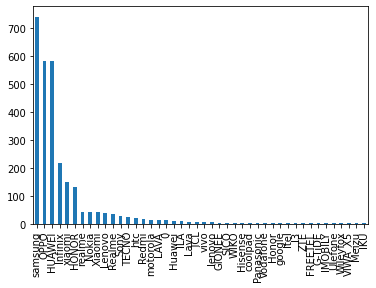

In [297]:
df[catagorical_cols[0]].value_counts().plot.bar()

In [ ]:
# Graph for each catagorical variable

# <font color='red'>Date data validation<font>

In [185]:
date_summary = pd.DataFrame([
    df[date_columns].apply(lambda x:round(x.value_counts().iloc[0]/x.count()*100,2)),
    df[date_columns].apply(lambda x:round(x.value_counts().iloc[-1]/x.count()*100,2)),
    df[date_columns].apply(lambda x:round(x.value_counts().where(lambda x:x==1).dropna().size / x.count()*100, 2))
], index=['Most frequent value Ratio', 'Least frequent value Ratio', 'Values occured only once Ratio']).T
date_summary = pd.merge(df[date_columns].agg(['count', pd.Series.nunique, min,max]).T, date_summary, left_index=True, right_index=True, how="outer")
date_summary

,count,nunique,min,max,Most frequent value Ratio,Least frequent value Ratio,Values occured only once Ratio
min_timestamp,2803,1142,1970-01-01,2020-09-03,5.57,0.04,26.36


In [259]:
for col in date_columns:
    f = set(np.arange(df[col].dt.year.min(),df[col].dt.year.max()+1)).difference(
        df[col].dt.year.unique()
    )
    if f:
        new_line()
        print(f"These Years (in order) are missing from The column <{col}>:\n")
        for i in f:
            print("\t", i, end=", ")
    print()

-------------------------
These Years (in order) are missing from The column <min_timestamp>:

	 1971, 	 1972, 	 1973, 	 1974, 	 1975, 	 1976, 	 1977, 	 1978, 	 1979, 	 1980, 	 1981, 	 1982, 	 1983, 	 1984, 	 1985, 	 1986, 	 1987, 	 1988, 	 1989, 	 1990, 	 1991, 	 1992, 	 1993, 	 1994, 	 1995, 	 1996, 	 1997, 	 1998, 	 1999, 	 2000, 


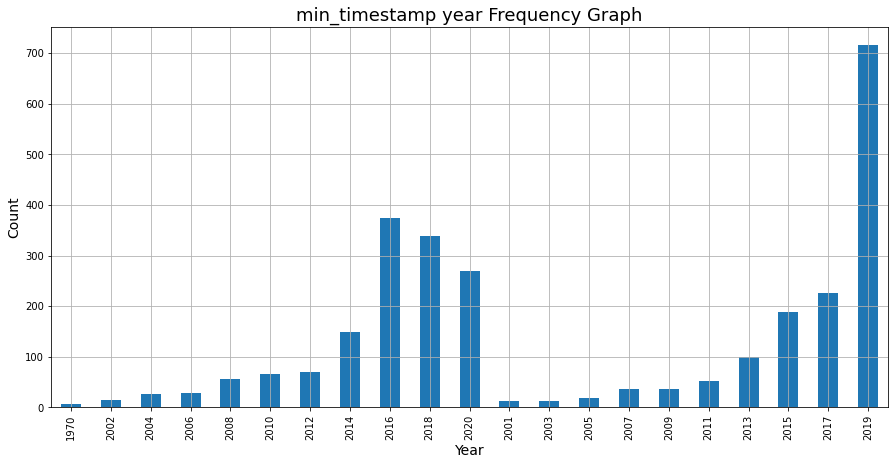

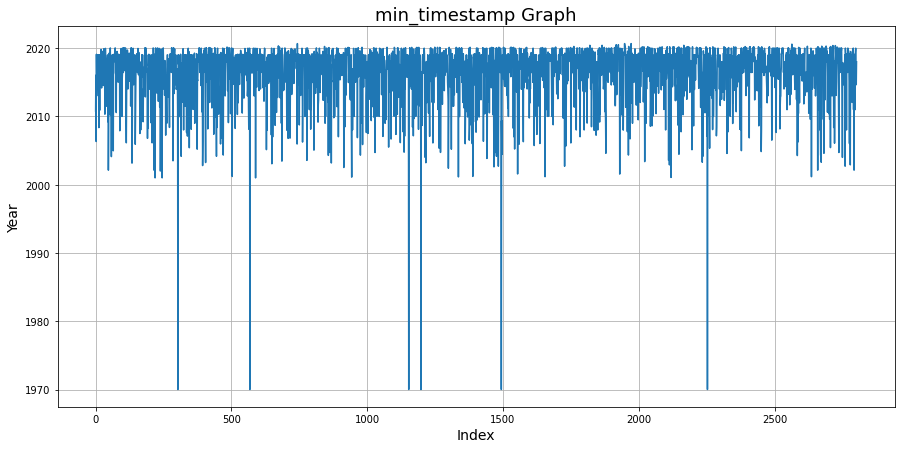

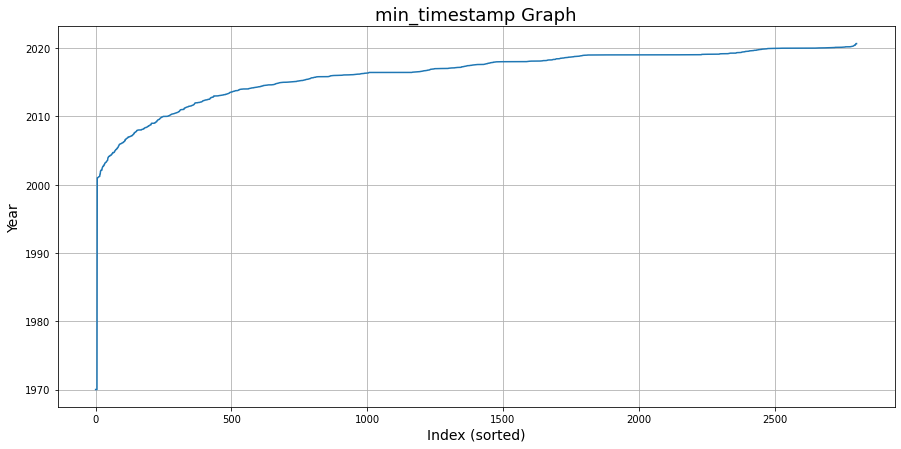

In [262]:
for col_date in date_columns:
    plot_date_columns(col_date)